# Emotion Classification Using Naive Bayes: Train, Validation, and Test Evaluation

In this Colab notebook, we apply the **Naive Bayes (MultinomialNB)** model to classify emotions using the augmented dataset. The dataset is split into **training**, **validation**, and **testing** subsets for robust evaluation, ensuring that the model's performance is well-assessed across unseen data.

### Key Highlights:
1. **Dataset Splitting:**
   - The dataset is divided into training (60%), validation (20%), and testing (20%) sets.
   - The training set is used to train the Naive Bayes model, the validation set is used for interim evaluation, and the test set is used for final performance assessment.

2. **TF-IDF Vectorization:**
   - The textual data is transformed into numerical features using **TF-IDF Vectorizer** for model input.

3. **Model Training and Evaluation:**
   - Naive Bayes is trained with default parameters.
   - The model's performance is evaluated on:
     - Training data: To verify learning effectiveness.
     - Validation data: To check generalization performance.
     - Test data: To measure performance on unseen examples.

4. **Confusion Matrix Analysis:**
   - The confusion matrix visualizes the model's predictions on the test set, providing detailed insights into its classification capabilities.




Training Accuracy: 0.5927317059420453
Classification Report on Training Data:
               precision    recall  f1-score   support

       anger       0.64      0.43      0.52     12530
     boredom       0.84      0.86      0.85      9899
   confusion       0.54      0.60      0.57     12650
     disgust       0.57      0.66      0.61     13763
        fear       0.55      0.42      0.48     13012
       guilt       0.54      0.48      0.51     13678
         joy       0.50      0.72      0.59     16533
     neutral       0.66      0.66      0.66     12356
     sadness       0.52      0.49      0.51     14313
       shame       0.57      0.48      0.52     12923
    surprise       0.76      0.80      0.78     10247

    accuracy                           0.59    141904
   macro avg       0.61      0.60      0.60    141904
weighted avg       0.60      0.59      0.59    141904


Validation Accuracy: 0.5409822202490434
Classification Report on Validation Data:
               precision

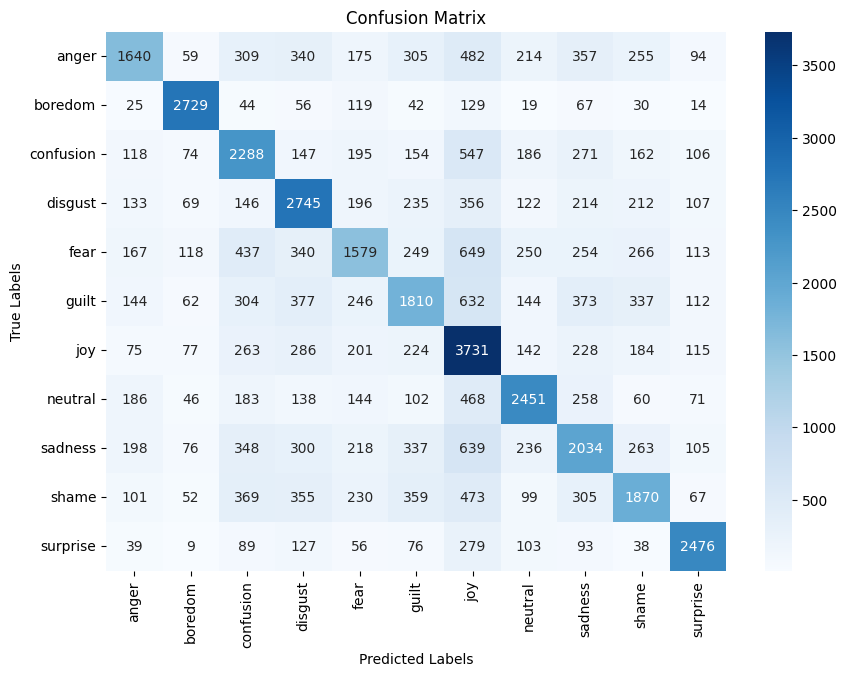

In [1]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Step 1: Load the augmented dataset
# Purpose: Load the dataset containing cleaned text and corresponding emotion labels.
df = pd.read_csv('Augmented_Emotion_Dataset.csv')

# Step 2: Split the dataset into features (X) and labels (y)
# X: Cleaned text data
# y: Emotion labels
X = df['cleaned_text']
y = df['EMOTION']

# Step 3: Split into train, validation, and test sets (60%-20%-20%)
# Purpose: Divide the dataset into training, validation, and testing subsets.
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 4: Vectorize the text data using TF-IDF
# Purpose: Transform text data into numerical feature vectors for machine learning input.
tfidf = TfidfVectorizer(max_features=5000)  # Maximum number of features set to 5000
X_train_tfidf = tfidf.fit_transform(X_train)  # Fit and transform the training data
X_val_tfidf = tfidf.transform(X_val)         # Transform the validation data
X_test_tfidf = tfidf.transform(X_test)       # Transform the testing data

# Step 5: Train Naive Bayes with default parameters
# Purpose: Train the Multinomial Naive Bayes model on the TF-IDF-transformed training data.
naive_bayes_model = MultinomialNB()  # Initialize the Naive Bayes model
naive_bayes_model.fit(X_train_tfidf, y_train)  # Train the model

# Step 6: Evaluate the model on the training set
# Purpose: Measure the model's learning performance on the training data.
y_train_pred = naive_bayes_model.predict(X_train_tfidf)  # Predict on the training data
train_accuracy = accuracy_score(y_train, y_train_pred)  # Calculate training accuracy
print("\nTraining Accuracy:", train_accuracy)
print("Classification Report on Training Data:\n", classification_report(y_train, y_train_pred))

# Step 7: Validate the model on the validation set
# Purpose: Assess the model's performance on unseen validation data.
y_val_pred = naive_bayes_model.predict(X_val_tfidf)  # Predict on the validation data
val_accuracy = accuracy_score(y_val, y_val_pred)  # Calculate validation accuracy
print("\nValidation Accuracy:", val_accuracy)
print("Classification Report on Validation Data:\n", classification_report(y_val, y_val_pred))

# Step 8: Test the model on the test set
# Purpose: Evaluate the model's generalization performance on the test data.
y_test_pred = naive_bayes_model.predict(X_test_tfidf)  # Predict on the test data
test_accuracy = accuracy_score(y_test, y_test_pred)  # Calculate test accuracy
print("\nTest Accuracy:", test_accuracy)
print("Classification Report on Test Data:\n", classification_report(y_test, y_test_pred))

# Step 9: Confusion matrix visualization
# Purpose: Provide detailed insights into the model's predictions on the test set.

def plot_confusion_matrix(y_true, y_pred, labels, title="Confusion Matrix"):
    """
    Plot the confusion matrix to analyze prediction results.
    - y_true: True labels
    - y_pred: Predicted labels
    - labels: Unique class labels
    - title: Title for the confusion matrix plot
    """
    cm = confusion_matrix(y_true, y_pred, labels=labels)  # Generate the confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)  # Plot heatmap
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Call the function to plot the confusion matrix for the test set
plot_confusion_matrix(y_test, y_test_pred, labels=np.unique(y))
